/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-

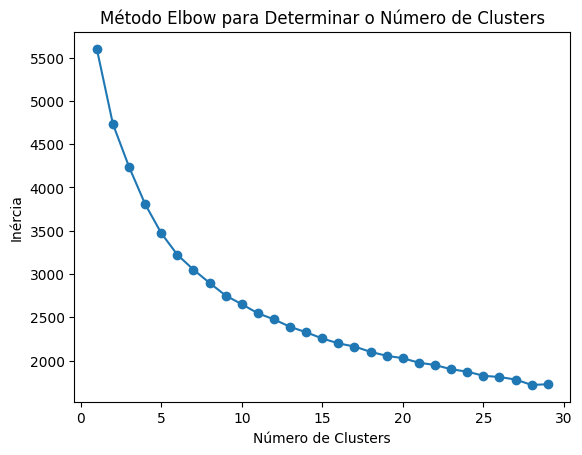

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Carregue o novo conjunto de dados
df = pd.read_csv('apple_quality.csv')

# Reduza para 700 linhas
df = df.head(700)

# Selecione as colunas relevantes para clustering
features = df[['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']]

# Codifique a coluna 'Quality' usando one-hot encoding
encoder = OneHotEncoder(sparse=False, drop='first')
quality_encoded = encoder.fit_transform(df[['Quality']])
quality_df = pd.DataFrame(quality_encoded, columns=['Quality_Bad'])

# Combine os DataFrames
features = pd.concat([features, quality_df], axis=1)

# Preencha os valores ausentes, se necessário
features = features.fillna(0)

# Padronize os dados para evitar que recursos com grandes magnitudes dominem o clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine o número ideal de clusters usando o método Elbow
inertia = []
for k in range(1, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plote o gráfico de Elbow
plt.plot(range(1, 30), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método Elbow para Determinar o Número de Clusters')
plt.show()

In [ ]:
# Com base no gráfico de Elbow, escolha um número apropriado de clusters e ajuste o modelo
k = 2 # Altere o número com base no gráfico de Elbow
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Exiba os resultados
print(df[['A_id', 'cluster']])

      A_id  cluster
0      0.0        0
1      1.0        0
2      2.0        1
3      3.0        0
4      4.0        0
..     ...      ...
695  695.0        1
696  696.0        1
697  697.0        0
698  698.0        0
699  699.0        0

[700 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Exibe algumas amostras de cada cluster
for cluster_num in range(k):
    samples_in_cluster = df[df['cluster'] == cluster_num].head(15)
    print(f"\nCluster {cluster_num}:\n{samples_in_cluster[['A_id', 'Quality', 'cluster']]}")



Cluster 0:
    A_id Quality  cluster
0    0.0    good        0
1    1.0    good        0
3    3.0    good        0
4    4.0    good        0
6    6.0    good        0
7    7.0    good        0
11  11.0    good        0
13  13.0    good        0
14  14.0    good        0
15  15.0    good        0
17  17.0    good        0
19  19.0    good        0
21  21.0    good        0
26  26.0    good        0
31  31.0    good        0

Cluster 1:
    A_id Quality  cluster
2    2.0     bad        1
5    5.0     bad        1
8    8.0     bad        1
9    9.0     bad        1
10  10.0     bad        1
12  12.0     bad        1
16  16.0     bad        1
18  18.0     bad        1
20  20.0     bad        1
22  22.0     bad        1
23  23.0     bad        1
24  24.0     bad        1
25  25.0     bad        1
27  27.0     bad        1
28  28.0     bad        1
